# Interpolation de Lagrange

In [1]:
import numpy as np
import matplotlib.pylab as plt

def eval_poly(P,x):
    s=0
    for i in range(len(P)):
        s=s+P[i]*x**i
    return s

In [2]:
eval_poly([2,4,2],3)

32

In [3]:
def produit(a,P):
    n=len(P)
    Q=[-a*P[0]]        
    for i in range(1,n) :
        Q.append(P[i-1]-a*P[i])
    Q.append(P[n-1])
    return Q

In [4]:
produit(2,[2,1,3])

[-4, 0, -5, 3]

In [5]:
def newton(X):
    n=len(X)
    M=np.zeros((n,n))
    A=[1]
    for i in range(n):
        for j in range(len(A)):
            M[j,i]=A[j]
        #M[:len(A),i]=A
        A=produit(X[i],A)        
    return M

In [6]:
x=[-3,-1,0,2,4]
M=newton(x)
M

array([[ 1.,  3.,  3.,  0.,  0.],
       [ 0.,  1.,  4.,  3., -6.],
       [ 0.,  0.,  1.,  4., -5.],
       [ 0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [7]:
def diff_div(X,Y):
    n=len(X)
    H=np.zeros((n,n))
    for i in range(n):
        H[i,0]=Y[i]        
    #ou bien directement H[:,0]=Y
    
    for j in range(1,n):
        for i in range(j,n):
            H[i,j]=(H[i,j-1]-H[i-1,j-1])/(X[i]-X[i-j])
    L=list()
    for i in range(n):
        L.append(H[i,i])
        
    return np.array(L)

In [8]:
y=[2,0,2,-1,1]
v=diff_div(x,y)
v

array([ 2.        , -1.        ,  1.        , -0.43333333,  0.11309524])

In [9]:
def coeff(C,M):   
    return np.dot(M,C)

#version 2 de coeff sans utiliser la fonction dot
def coeff2(C,M):
    n=len(C)
    N=[]    
    for i in range(n):
        s=0
        for j in range(n):            
            s=M[i,j]*C[j]+s
        N.append(s)
    return np.array(N)

In [10]:
coeff(v,M)

array([ 2.        ,  1.02142857, -1.29880952, -0.20714286,  0.11309524])

In [11]:
coeff2(v,M)

array([ 2.        ,  1.02142857, -1.29880952, -0.20714286,  0.11309524])

In [12]:
def interp_lagrange(X,Y):
    M=newton(X)
    C=diff_div(X,Y)
    PL=coeff(C,M)
    return PL

On teste avec la fonction que nous venons d'implémenter - inter_lagrange

[ 2.          1.02142857 -1.29880952 -0.20714286  0.11309524]


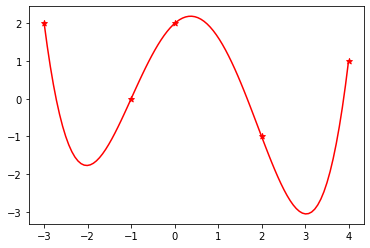

In [13]:
x=[-3,-1,0,2,4]
y=[2,0,2,-1,1]
PL=interp_lagrange(x,y)
print(PL)

X=np.linspace(-3,4,100)
Y1=[eval_poly(PL,i) for i in X]
#Y1=eval_poly(PL,X)

#pour marquer les points avec une petite '*'
plt.scatter(x,y,marker='*',c='red')
plt.plot(X,Y1,color='red')
plt.show()

On teste avec la fonction prédéfinie de scipy.interpolate (lagrange)



         4          3         2
0.1131 x - 0.2071 x - 1.299 x + 1.021 x + 2 <class 'numpy.poly1d'>


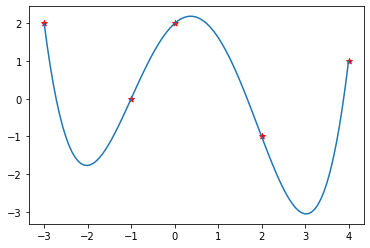

In [14]:
import scipy.interpolate as sci
PLS=sci.lagrange(x,y)
Y2=PLS(X)
print('\n\n',PLS,type(PLS))
#pour marquer les points avec une petite '*'
plt.scatter(x,y,marker='*',c='red')
#les courbes vont etre confondues si tout est OK
plt.plot(X,Y2)
plt.show()

On trace les deux courbes dans un même graphique: elles sont confondues.

[ 2.          1.02142857 -1.29880952 -0.20714286  0.11309524]


         4          3         2
0.1131 x - 0.2071 x - 1.299 x + 1.021 x + 2 <class 'numpy.poly1d'>


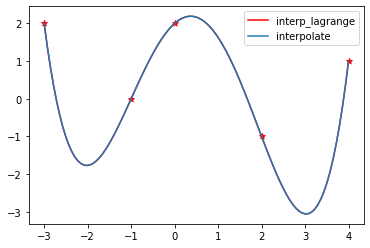

In [15]:
#script principal
x=[-3,-1,0,2,4]
y=[2,0,2,-1,1]

PL=interp_lagrange(x,y)
print(PL)
PLS=sci.lagrange(x,y)
print('\n\n',PLS,type(PLS))

X=np.linspace(-3,4,100)

Y1=[eval_poly(PL,i) for i in X]
#Y1=eval_poly(PL,X)

Y2=PLS(X)
#pour marquer les points avec une petite '*'
plt.scatter(x,y,marker='*',c='red')
#les courbes vont etre confondues si tout est OK
plt.plot(X,Y1,color='red')
plt.plot(X,Y2)
plt.legend(['interp_lagrange','interpolate'])
plt.show()